In [1]:
# Let's import all required Libraries:

import selenium                              # Library that is used to work with selenium.
from selenium import webdriver               # Importing webdriver module from selenium to open automated chrome window
import pandas as pd                          # to create Dataframe
from selenium.webdriver.common.by import By  # importing inbuilt class by
import warnings                              # to ignore any sort of warning
warnings.filterwarnings("ignore")       
import time                                  # use to stop engine for few seconds

# Question 1.

Write a python program to scrape data for **“Data Analyst”** Job position in **“Bangalore”** location. You have to scrape the **job-title, job-location, company_name, experience_required**. You have to scrape **first 10 jobs** data.

This task will be done in following steps:
- 1. First get the webpage https://www.naukri.com/
- 2. Enter “Data Analyst” in “Skill, Designations, Companies” field and enter “Bangalore” in “enter the location” field.
- 3. Then click the search button.
- 4. Then scrape the data for the first 10 jobs results you get.
- 5. Finally create a dataframe of the scraped data.

In [2]:
# Let's frist connect to web driver:

driver = webdriver.Chrome(r"C:\Users\Lenovo\chromedriver.exe")

In [3]:
#opening up naukri.com website on automated chrome window:

url = 'https://www.naukri.com/'
driver.get(url)

In [74]:
# Let's maximize the automated chrome window:

driver.maximize_window()

In [75]:
# finding web element for search job bar:

search_job = driver.find_element(By.CLASS_NAME,"suggestor-input")
search_job.send_keys("Data Analyst")

In [76]:
#finding web elements to get location bar using absolute xpath:

search_locn = driver.find_element(By.XPATH,"/html[1]/body[1]/div[1]/div[6]/div[1]/div[1]/div[5]/div[1]/div[1]/div[1]/input[1]")
search_locn.send_keys("Banglore")

In [77]:
# Clicking on search icon:

click_search = driver.find_element(By.CLASS_NAME,"qsbSubmit")
click_search.click()

**Extracting job titles**

In [78]:
# Let's extract all web elements having job titles:

job_titles = []
title_tags = driver.find_elements(By.XPATH,"//a[@class='title fw500 ellipsis']")
for i  in title_tags[0:10]:
    job_titles.append(i.text)
job_titles

['Associate Healthcare and Data Analyst',
 'Associate Healthcare and Data Analyst',
 'Business Data Analyst',
 'Business Data Analysts (Tableau)',
 'Sr. Associate - Data Analyst',
 'Data Analyst 2',
 'Senior People Data Analyst',
 'Manager/Senior Manager - Data Analyst',
 'Manager / Senior Manager - Data Analyst',
 'Technical Data Analyst']

**Extracting company names**

In [79]:
# Let's extract all web elements having company names
company_names = []
company_tags = driver.find_elements(By.XPATH,'//a[@class="subTitle ellipsis fleft"]')
for i in company_tags[0:10]:
    company_names.append(i.text)
company_names 

['CPA Global',
 'Clarivate',
 'Astreya',
 'Zscaler Softech',
 'Uplers',
 'Paypal',
 'Western Digital',
 'Huquo Consulting Pvt. Ltd',
 'Huquo Consulting Pvt. Ltd',
 'Wipro']

**Extracting Location**

In [80]:
location = []
locn_tags = driver.find_elements(By.XPATH,'//span[@class="ellipsis fleft fs12 lh16 locWdth"]')
for i in locn_tags[0:10]:
    location.append(i.text)
location

['Bangalore/Bengaluru',
 'Bangalore/Bengaluru',
 'Hybrid - Hyderabad/Secunderabad, Gurgaon/Gurugram, Bangalore/Bengaluru',
 'Bangalore/Bengaluru',
 'Permanent Remote',
 'Bangalore/Bengaluru',
 'Bangalore/Bengaluru',
 'Mumbai, Hyderabad/Secunderabad, Pune, Gurgaon/Gurugram, Ahmedabad, Jaipur, Delhi / NCR, Bangalore/Bengaluru',
 'Mumbai, Hyderabad/Secunderabad, Pune, Gurgaon/Gurugram, Ahmedabad, Jaipur, Delhi / NCR, Bangalore/Bengaluru',
 'Hybrid - Gurgaon/Gurugram, Bangalore/Bengaluru']

**Extracting Experience_Required**

In [81]:
# Lets extract all web elements having experience using parent tag:

experience =[]
exp_tags = driver.find_elements(By.XPATH,'//span[@class="ellipsis fleft fs12 lh16 expwdth"]')
for i in exp_tags[0:10]:
    experience.append(i.text)
experience

['0-2 Yrs',
 '0-2 Yrs',
 '2-5 Yrs',
 '5-10 Yrs',
 '3-8 Yrs',
 '5-8 Yrs',
 '5-10 Yrs',
 '2-7 Yrs',
 '2-7 Yrs',
 '5-10 Yrs']

In [82]:
len(location),len(company_names),len(job_titles),len(experience)

(10, 10, 10, 10)

**Creating DataFrame**

In [83]:
jobs= pd.DataFrame()
jobs['job_titles'] = job_titles
jobs['location'] = location
jobs['company_names'] = company_names
jobs['Experience_Required'] = experience

jobs.index.name = "S.No."
jobs.index += 1
jobs

,job_titles,location,company_names,Experience_Required
S.No.,,,,
1,Associate Healthcare and Data Analyst,Bangalore/Bengaluru,CPA Global,0-2 Yrs
2,Associate Healthcare and Data Analyst,Bangalore/Bengaluru,Clarivate,0-2 Yrs
3,Business Data Analyst,"Hybrid - Hyderabad/Secunderabad, Gurgaon/Gurug...",Astreya,2-5 Yrs
4,Business Data Analysts (Tableau),Bangalore/Bengaluru,Zscaler Softech,5-10 Yrs
5,Sr. Associate - Data Analyst,Permanent Remote,Uplers,3-8 Yrs
6,Data Analyst 2,Bangalore/Bengaluru,Paypal,5-8 Yrs
7,Senior People Data Analyst,Bangalore/Bengaluru,Western Digital,5-10 Yrs
8,Manager/Senior Manager - Data Analyst,"Mumbai, Hyderabad/Secunderabad, Pune, Gurgaon/...",Huquo Consulting Pvt. Ltd,2-7 Yrs
9,Manager / Senior Manager - Data Analyst,"Mumbai, Hyderabad/Secunderabad, Pune, Gurgaon/...",Huquo Consulting Pvt. Ltd,2-7 Yrs


In [84]:
# Closing of Automated Window:

driver.close()

# Question 2

Write a python program to scrape data for **“Data Scientist”** Job position in **“Bangalore”** location. You
have to scrape the **job-title, job-location, company_name**. You have to scrape **first 10 jobs** data.

This task will be done in following steps:
- 1. First get the webpage https://www.naukri.com/
- 2. Enter “Data Scientist” in “Skill, Designations, Companies” field and enter “Bangalore” in “enter the location” field.
- 3. Then click the search button.
- 4. Then scrape the data for the first 10 jobs results you get.
- 5. Finally create a dataframe of the scraped data.

In [5]:
# Let's frist connect to web driver:

driver = webdriver.Chrome(r"C:\Users\Lenovo\chromedriver.exe")

In [6]:
# opening up naukri.com website on automated chrome window:

url = 'https://www.naukri.com/'
driver.get(url)

In [7]:
# Let's maximize the automated chrome window:

driver.maximize_window()

In [8]:
# finding web element for search job bar:

search_job = driver.find_element(By.CLASS_NAME,"suggestor-input")
search_job.send_keys("Data scientist")

In [9]:
# finding web elements to get location bar using absolute xpath:

search_locn = driver.find_element(By.XPATH,"/html[1]/body[1]/div[1]/div[6]/div[1]/div[1]/div[5]/div[1]/div[1]/div[1]/input[1]")
search_locn.send_keys("Banglore")

In [10]:
# Clicking on search icon:

click_search = driver.find_element(By.CLASS_NAME,"qsbSubmit")
click_search.click() 

**Extracting job titles**

In [18]:
# Let's extract all web elements having job titles:

job_titles = []
title_tags = driver.find_elements(By.XPATH,"//a[@class='title fw500 ellipsis']")
for i  in title_tags[0:10]:
    job_titles.append(i.text)
job_titles

['Analystics & Modeling Specialist',
 'Assistant Manager - Data Science',
 'Senior Data Scientist',
 'Program Manager, Analytics',
 'Data Scientist',
 'ACN - Applied Intelligence - Data Scientist - 09',
 'Data Scientist - Looking For Immediate Joiners',
 'Data Scientist',
 'Senior Data Scientist',
 'Data Scientist - II']

**Extracting company names**

In [19]:
# Let's extract all web elements having company names:
company_names = []
company_tags = driver.find_elements(By.XPATH,'//a[@class="subTitle ellipsis fleft"]')
for i in company_tags[0:10]:
    company_names.append(i.text)
company_names  

['Accenture',
 'Citiustech',
 'Wipro',
 'Uber',
 'Quest Global',
 'Accenture',
 'Wipro',
 'Altair',
 'Boston Consulting Group',
 'Bizongo']

**Extracting Location**

In [20]:
# Let's extract all web elements having location:
location = []
locn_tags = driver.find_elements(By.XPATH,'//li[@class="fleft grey-text br2 placeHolderLi location"]')
for i in locn_tags[0:10]:
    location.append(i.text)
location

['Kolkata, Mumbai, Hyderabad/Secunderabad, Pune, Chennai, Bangalore/Bengaluru',
 'Hybrid - Mumbai, Pune, Bangalore/Bengaluru',
 'Hybrid - Pune, Chennai, Bangalore/Bengaluru',
 'Bangalore/Bengaluru',
 'Bangalore/Bengaluru',
 'Bangalore/Bengaluru',
 'Hybrid - Hyderabad/Secunderabad, Bangalore/Bengaluru',
 'Hyderabad/Secunderabad, Pune, Chennai, Bangalore/Bengaluru',
 'Mumbai, New Delhi, Chennai, Bangalore/Bengaluru',
 'India, Bangalore/Bengaluru, Mumbai (All Areas)']

**Creating DataFrame**

In [21]:
len(location),len(company_names),len(job_titles)

(10, 10, 10)

In [22]:
jobs= pd.DataFrame()
jobs['job_titles'] = job_titles
jobs['location'] = location
jobs['company_names'] = company_names

jobs.index.name = "S.No."
jobs.index += 1
jobs

,job_titles,location,company_names
S.No.,,,
1,Analystics & Modeling Specialist,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",Accenture
2,Assistant Manager - Data Science,"Hybrid - Mumbai, Pune, Bangalore/Bengaluru",Citiustech
3,Senior Data Scientist,"Hybrid - Pune, Chennai, Bangalore/Bengaluru",Wipro
4,"Program Manager, Analytics",Bangalore/Bengaluru,Uber
5,Data Scientist,Bangalore/Bengaluru,Quest Global
6,ACN - Applied Intelligence - Data Scientist - 09,Bangalore/Bengaluru,Accenture
7,Data Scientist - Looking For Immediate Joiners,"Hybrid - Hyderabad/Secunderabad, Bangalore/Ben...",Wipro
8,Data Scientist,"Hyderabad/Secunderabad, Pune, Chennai, Bangalo...",Altair
9,Senior Data Scientist,"Mumbai, New Delhi, Chennai, Bangalore/Bengaluru",Boston Consulting Group


In [23]:
# Closing of Automated Window:

driver.close()

# Question 3

In this question you have to **scrape data using the filters** available on the webpage as shown below:

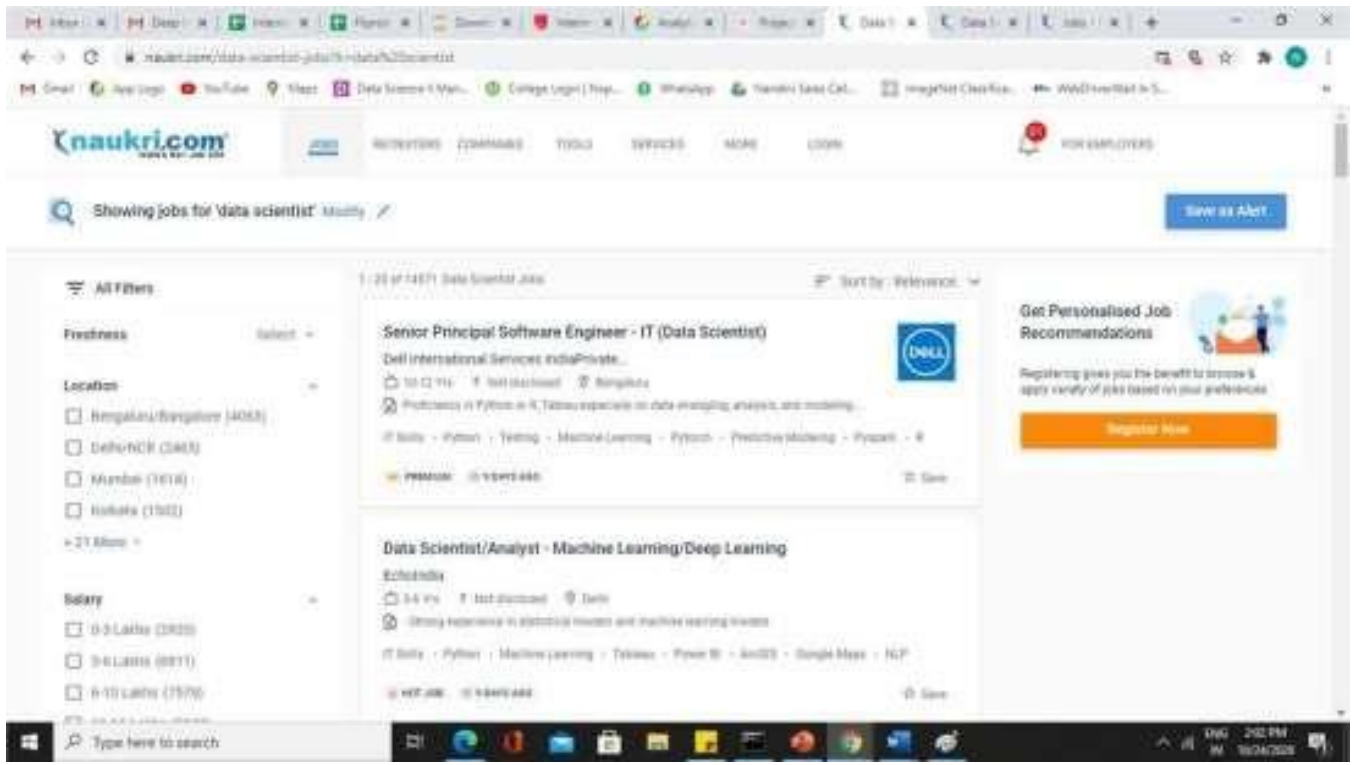

You have to use the **location and salary filter**.
You have to scrape data for **“Data Scientist”** designation for **first 10 job** results.
You have to scrape the **job-title, job-location, company name, experience required**.
The location filter to be used is **“Delhi/NCR”**. The salary filter to be used is **“3-6” lakhs**.
The task will be done as shown in the below steps:
- 1. first get the webpage https://www.naukri.com/ .
- 2. Enter “Data Scientist” in “Skill, Designations, and Companies” field.
- 3. Then click the search button.
- 4. Then apply the location filter and salary filter by checking the respective boxes.
- 5. Then scrape the data for the first 10 jobs results you get.
- 6. Finally create a dataframe of the scraped data.

In [48]:
# Let's first connect to web driver:

driver = webdriver.Chrome(r"C:\Users\Lenovo\chromedriver.exe")

In [49]:
# Let's maximize the automated chrome window:

driver.maximize_window()

**1. Getting the webpage https://www.naukri.com/**

In [50]:
# opening up naukri.com website on automated chrome window:

url = 'https://www.naukri.com/'
driver.get(url)

**2. Entering “Data Scientist” in “Skill, Designations, and Companies” field.**

In [51]:
# finding web element (here: ("Data scientist")) for 'search job' bar:

search_job = driver.find_element(By.CLASS_NAME,"suggestor-input")
search_job.send_keys("Data scientist")

**3. Clicking the search button.**

In [52]:
# for Clicking: use absolute xpath function:

click_search = driver.find_element(By.CLASS_NAME,"qsbSubmit")
click_search.click() 

**4. Applying the location filter and salary filter by checking the respective boxes.**

In [53]:
# The location filter to be used is “Delhi/NCR”.

fltr_locn = driver.find_element(By.XPATH,"/html/body/div[1]/div[4]/div/section[1]/div[2]/div[13]/div[2]/div[2]/label/i")
fltr_locn.click()

In [54]:
# The salary filter to be used is “3-6” lakhs.

fltr_sal = driver.find_element(By.XPATH,"/html/body/div[1]/div[4]/div/section[1]/div[2]/div[5]/div[2]/div[2]/label/i")
fltr_sal.click()

**5. Scraping the job-title data, job-location data, company name data & experience required data for the first 10 jobs results.**

In [57]:
# Extracting job titles:

job_titles = []
title_tags = driver.find_elements(By.XPATH,"//a[@class='title fw500 ellipsis']")
for i in title_tags[0:10]:
    job_titles.append(i.text)
job_titles

['Data Scientist',
 'DigitalBCG GAMMA Data Scientist',
 'Urgent hiring For Data Scientist (PHD Must Have)',
 'Manager - Data Science - Banking&Financial Services - IIM/ISB/MDI/FMS',
 'Data Scientist / Sr. Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data scientist- Python',
 'Data Scientist']

In [58]:
# Extracting Location:

location = []
locn_tags = driver.find_elements(By.XPATH,'//span[@class="ellipsis fleft fs12 lh16 locWdth"]')
for i in locn_tags[0:10]:
    location.append(i.text)
location

['Noida, Hyderabad/Secunderabad, Chennai, Bangalore/Bengaluru',
 'New Delhi, Bangalore/Bengaluru',
 'Temp. WFH - Noida, Pune',
 'Delhi / NCR, Bangalore/Bengaluru',
 'Temp. WFH - Noida',
 'Dehradun, Hyderabad/Secunderabad, Gurgaon/Gurugram',
 'Noida',
 'Noida',
 'Gurgaon/Gurugram',
 'New Delhi']

In [59]:
# Extracting company names:

company_names = []
company_tags = driver.find_elements(By.XPATH,'//a[@class="subTitle ellipsis fleft"]')
for i in company_tags[0:10]:
    company_names.append(i.text)
company_names 

['HCLTech',
 'Boston Consulting Group',
 'NGI Ventures',
 'Black Turtle',
 'Wegarner Solutions',
 'torcai digital media',
 'Meon Technologies',
 'Alliance Recruitment Agency',
 'TeamPlus Staffing Solution Pvt Ltd',
 'Razor Group GmbH']

In [60]:
# Extracting experience:

experience =[]
exp_tags = driver.find_elements(By.XPATH,'//span[@class="ellipsis fleft fs12 lh16 expwdth"]')
for i in exp_tags[0:10]:
    experience.append(i.text)
experience

['4-9 Yrs',
 '2-5 Yrs',
 '0-4 Yrs',
 '4-8 Yrs',
 '3-8 Yrs',
 '2-7 Yrs',
 '2-5 Yrs',
 '3-4 Yrs',
 '3-6 Yrs',
 '2-3 Yrs']

**6. Creating a dataframe of the scraped data.**

In [61]:
len(location),len(company_names),len(job_titles),len(experience)

(10, 10, 10, 10)

In [62]:
jobs= pd.DataFrame()
jobs['job_titles'] = job_titles
jobs['location'] = location
jobs['company_names'] = company_names
jobs['Experience_Required'] = experience

jobs.index.name = "S.No."
jobs.index += 1
jobs

,job_titles,location,company_names,Experience_Required
S.No.,,,,
1,Data Scientist,"Noida, Hyderabad/Secunderabad, Chennai, Bangal...",HCLTech,4-9 Yrs
2,DigitalBCG GAMMA Data Scientist,"New Delhi, Bangalore/Bengaluru",Boston Consulting Group,2-5 Yrs
3,Urgent hiring For Data Scientist (PHD Must Have),"Temp. WFH - Noida, Pune",NGI Ventures,0-4 Yrs
4,Manager - Data Science - Banking&Financial Ser...,"Delhi / NCR, Bangalore/Bengaluru",Black Turtle,4-8 Yrs
5,Data Scientist / Sr. Data Scientist,Temp. WFH - Noida,Wegarner Solutions,3-8 Yrs
6,Data Scientist,"Dehradun, Hyderabad/Secunderabad, Gurgaon/Guru...",torcai digital media,2-7 Yrs
7,Data Scientist,Noida,Meon Technologies,2-5 Yrs
8,Data Scientist,Noida,Alliance Recruitment Agency,3-4 Yrs
9,Data scientist- Python,Gurgaon/Gurugram,TeamPlus Staffing Solution Pvt Ltd,3-6 Yrs


In [63]:
# Closing of Automated Window:

driver.close()

# Question 4

Scrape data of **first 100 sunglasses** listings on flipkart.com. You have to scrape following attributes:
- 1. Brand
- 2. Product Description
- 3. Price

To scrape the data you have to go through following steps:

- 1. Go to Flipkart webpage by url : https://www.flipkart.com/
- 2. Enter “sunglasses” in the search field where “search for products, brands and more” is written and click the search icon.
- 3. After that you will reach to the page having a lot of sunglasses. From this page you can scrap the required data as usual.
- 4. After scraping data from the first page, go to the “Next” Button at the bottom other page , then click on it.
- 5. Now scrape data from this page as usual.
- 6. Repeat this until you get data for 100 sunglasses.

In [137]:
# Let's first connect to web driver:

driver = webdriver.Chrome(r"C:\Users\Lenovo\chromedriver.exe")

In [138]:
# Let's maximize the automated chrome window:

driver.maximize_window()

**1. Getting the webpage https://www.flipkart.com/**

In [139]:
#opening up flipkart.com website on automated chrome window:

url = 'https://www.flipkart.com/'
driver.get(url)

**2. Enter “sunglasses” in the search field where “search for products, brands and more” is written and click the search icon.**

In [142]:
# finding web element:

search_ = driver.find_element(By.CLASS_NAME,"_3704LK")
search_.send_keys("sunglasses")

In [143]:
# for Clicking: use absolute xpath function:

click_search = driver.find_element(By.CLASS_NAME,"L0Z3Pu")
click_search.click() 

**3. Scrapping the required data (i.e. Brand, Product Description, Price) from the First Page:**

In [ ]:
# PAGE_1

In [154]:
# Extracting Brand Name:

Brand1 = []
Brand_tags = driver.find_elements(By.XPATH,"//div[@class='_2WkVRV']")
for i in Brand_tags:
    Brand1.append(i.text)
#Brand1

In [155]:
# Extracting Product Description:

Prod_Desc1 = []
Prod_Desc_tags = driver.find_elements(By.XPATH,"//a[@class='IRpwTa']")
for i in Prod_Desc_tags:
    Prod_Desc1.append(i.text)
#Prod_Desc1

In [156]:
# Extracting Price of the product:

Price1 = []
Price_tags = driver.find_elements(By.XPATH,"//div[@class='_30jeq3']")
for i in Price_tags:
    Price1.append(i.text)
#Price1

In [165]:
len(Price1),len(Prod_Desc1),len(Brand1)

(40, 40, 40)

**4. Scrapping the required data (i.e. Brand, Product Description, Price) from the Second Page:**

In [153]:
# Clicking NEXT button:

click_next2 = driver.find_element(By.CLASS_NAME,"_1LKTO3")
click_next2.click() 

In [157]:
# PAGE_2

In [161]:
# Extracting Brand Name:

Brand2 = []
Brand_tags = driver.find_elements(By.XPATH,"//div[@class='_2WkVRV']")
for i in Brand_tags:
    Brand2.append(i.text)
#Brand2

In [162]:
# Extracting Product Description:

Prod_Desc2 = []
Prod_Desc_tags = driver.find_elements(By.XPATH,"//a[@class='IRpwTa']")
for i in Prod_Desc_tags:
    Prod_Desc2.append(i.text)
#Prod_Desc2

In [163]:
# Extracting Price of the product:

Price2 = []
Price_tags = driver.find_elements(By.XPATH,"//div[@class='_30jeq3']")
for i in Price_tags:
    Price2.append(i.text)
#Price2

In [164]:
len(Price2),len(Prod_Desc2),len(Brand2)

(40, 40, 40)

**5. Scrapping the required data (i.e. Brand, Product Description, Price) from the Third Page:**

In [174]:
# Clicking NEXT button:

click_next3 = driver.find_element(By.XPATH,"/html/body/div[1]/div/div[3]/div[1]/div[2]/div[12]/div/div/nav/a[4]")
click_next3.click()

In [ ]:
# PAGE_3

In [186]:
# Extracting Brand Name:

Brand3 = []
Brand_tags = driver.find_elements(By.XPATH,"//div[@class='_2WkVRV']")
for i in Brand_tags[0:20]:
    Brand3.append(i.text)
#Brand3

In [185]:
# Extracting Product Description:

Prod_Desc3 = []
Prod_Desc_tags = driver.find_elements(By.XPATH,"//a[@class='IRpwTa']")
for i in Prod_Desc_tags[0:20]:
    Prod_Desc3.append(i.text)
#Prod_Desc3

In [184]:
# Extracting Price of the product:

Price3 = []
Price_tags = driver.find_elements(By.XPATH,"//div[@class='_30jeq3']")
for i in Price_tags[0:20]:
    Price3.append(i.text)
#Price3

In [180]:
len(Price3),len(Prod_Desc3),len(Brand3)

(20, 20, 20)

**6. Creating a dataframe of the scraped data.**

In [181]:
Brand = Brand1 + Brand2 + Brand3
Prod_Desc = Prod_Desc1 + Prod_Desc2 + Prod_Desc3
Price = Price1 + Price2 + Price3

In [182]:
len(Price),len(Prod_Desc),len(Brand)

(100, 100, 100)

In [183]:
sunglasses = pd.DataFrame()
sunglasses['Brand_Name'] = Brand
sunglasses['Product Description'] = Prod_Desc
sunglasses['Price'] = Price

sunglasses.index.name = "S.No."
sunglasses.index += 1
sunglasses

,Brand_Name,Product Description,Price
S.No.,,,
1,ROZZETTA CRAFT,UV Protection Spectacle Sunglasses (Free Size),₹379
2,DEXENT COLLECTION,UV Protection Oval Sunglasses (Free Size),₹227
3,Fastrack,"Gradient, UV Protection Wayfarer Sunglasses (F...",₹679
4,PIRASO,UV Protection Aviator Sunglasses (58),₹323
5,Fastrack,UV Protection Aviator Sunglasses (Free Size),₹579
...,...,...,...
96,ROYAL SON,Mirrored Aviator Sunglasses (55),₹379
97,ROZZETTA CRAFT,"UV Protection, Gradient Retro Square Sunglasse...",₹474
98,Poshh eyewear,UV Protection Retro Square Sunglasses (Free Size),₹199


In [187]:
# Closing of Automated Window:

driver.close()

# Question 5: 

Scrape **first 100 reviews** data from flipkart.com for **iphone11** phone. You have to go the link:
https://www.flipkart.com/apple-iphone-11-black-64-gb/product-reviews/itm4e5041ba101fd?pid=MOBFWQ6BXGJCEYNY&lid=LSTMOBFWQ6BXGJCEYNYZXSHRJ&marketplace=FLIPKART.

Scrape the following attributes:

- 1. Rating
- 2. Review summary
- 3. Full review

In [85]:
# Let's first connect to web driver:

driver = webdriver.Chrome(r"C:\Users\Lenovo\chromedriver.exe")

In [86]:
# Let's maximize the automated chrome window:

driver.maximize_window()

In [87]:
# Opening up naukri.com website on automated chrome window:

url = 'https://www.flipkart.com/apple-iphone-11-black-64-gb/product-reviews/itm4e5041ba101fd?pid=MOBFWQ6BXGJCEYNY&lid=LSTMOBFWQ6BXGJCEYNYZXSHRJ&marketplace=FLIPKART'
driver.get(url)

In [88]:
# Extracting Ratings:

Rating = []
# Getting data from 10 pages:
for page in range(0,10):
    Rate_tags = driver.find_elements(By.XPATH,"//div[@class='_3LWZlK _1BLPMq']") # 'rating' attributes.
    for i in Rate_tags:
        Rating.append(i.text)
    next_page = driver.find_element(By.XPATH,"//a[@class='_1LKTO3']") # 'next page' attributes.
    next_page.click()
    time.sleep(3)
    
Rating

['5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4']

In [90]:
# Extracting Review summary:

Rev_sum = []
# Getting data from 10 pages:
for page in range(0,10):
    Rev_sum_tags = driver.find_elements(By.XPATH,"//p[@class='_2-N8zT']") # 'Review summary' attributes.
    for i in Rev_sum_tags:
        Rev_sum.append(i.text)
    next_page2 = driver.find_element(By.XPATH,"//a[@class='_1LKTO3']") # 'next page' attributes.
    next_page2.click()
    time.sleep(3)
    
Rev_sum

['Simply awesome',
 'Perfect product!',
 'Value-for-money',
 'Best in the market!',
 'Highly recommended',
 'Worth every penny',
 'Highly recommended',
 'Perfect product!',
 'Great product',
 'Fabulous!',
 'Pretty good',
 'Worth every penny',
 'Classy product',
 'Good choice',
 'Perfect product!',
 'Perfect product!',
 'Highly recommended',
 'Perfect product!',
 'Highly recommended',
 'Value-for-money',
 'Simply awesome',
 'Perfect product!',
 'Value-for-money',
 'Best in the market!',
 'Highly recommended',
 'Worth every penny',
 'Highly recommended',
 'Perfect product!',
 'Great product',
 'Fabulous!',
 'Pretty good',
 'Worth every penny',
 'Classy product',
 'Good choice',
 'Perfect product!',
 'Perfect product!',
 'Highly recommended',
 'Perfect product!',
 'Highly recommended',
 'Value-for-money',
 'Simply awesome',
 'Perfect product!',
 'Value-for-money',
 'Best in the market!',
 'Highly recommended',
 'Worth every penny',
 'Highly recommended',
 'Perfect product!',
 'Great produ

In [91]:
# Extracting Full review:

Full_Rev = []
# Getting data from 10 pages:
for page in range(0,10):
    Full_Rev_tags = driver.find_elements(By.XPATH,"//div[@class='t-ZTKy']") # 'Full review' attributes.
    for i in Full_Rev_tags:
        Full_Rev.append(i.text)
    next_page3 = driver.find_element(By.XPATH,"//a[@class='_1LKTO3']") # 'next page' attributes.
    next_page3.click()
    time.sleep(3)
    
Full_Rev

['Really satisfied with the Product I received... It’s totally genuine and the packaging was also really good so if ur planning to buy just go for it.',
 'Amazing phone with great cameras and better battery which gives you the best performance. I just love the camera .',
 "I'm Really happy with the product\nDelivery was fast as well\n..it was a gift for my sister and she loved it so much.",
 'Great iPhone very snappy experience as apple kind. Upgraded from iPhone 7.\nPros\n-Camera top class\n- Battery top performed\n-Chipset no need to say as apple kind\n-Security as you expect from apple\n- Display super bright industry leading colour\naccuracy and super responsive\n-Build quality as expect from apple sturdy\npremium durable beautiful stylish.\n-Os most stable os in smartphone industry\n\nCons\n-No 5G\n-Display is not based on OLED technology\n-Charger headphones and 1 apple stic...\nREAD MORE',
 "It's my first time to use iOS phone and I am loving my upgradation 😍😍 I love the color, 

In [92]:
len(Rating),len(Rev_sum),len(Full_Rev)

(100, 100, 100)

In [93]:
# Closing of Automated Window:

driver.close()

# Question 6: 

Scrape data for **first 100 sneakers** you find when you visit flipkart.com and search for **“sneakers”** in the search field.

You have to scrape 4 attributes of each sneaker:

- 1. Brand
- 2. Product Description
- 3. Price

In [20]:
# Let's first connect to web driver:

driver = webdriver.Chrome('chromedriver.exe')

In [21]:
# Let's maximize the automated chrome window:

driver.maximize_window()

In [22]:
#opening up flipkart.com website on automated chrome window:

url = 'https://www.flipkart.com/'
driver.get(url)

In [23]:
# denying login:

cut_ = driver.find_element(By.XPATH,"/html/body/div[2]/div/div/button")
cut_.click()

In [24]:
# finding web element:

search_ = driver.find_element(By.CLASS_NAME,"_3704LK")
search_.send_keys("sneakers")

In [25]:
# for Clicking: use absolute xpath function:

click_search = driver.find_element(By.CLASS_NAME,"L0Z3Pu")
click_search.click()

In [26]:
# Scrapping the required data (i.e. Brand, Product Description, Price) 

In [27]:
# Extracting Brand_Names:

Brand = []
# Getting data from 3 pages:
for page in range(0,3):
    Brand_tags = driver.find_elements(By.XPATH,"//div[@class='_2WkVRV']") # 'Brand_Names' attributes.
    for i in Brand_tags:
        Brand.append(i.text)
    next_page = driver.find_element(By.XPATH,"//a[@class='_1LKTO3']") # 'next page' attributes.
    next_page.click()
    time.sleep(3)
    
Brand_Name = Brand[0:100]
#Brand_Name

In [33]:
# Extracting Product Description:

Prod_desc = []
# Getting data from 3 pages:
for page in range(0,3):
    Prod_desc_tags = driver.find_elements(By.XPATH,"//a[@class='IRpwTa']") # 'Product Description' attributes.
    for i in Prod_desc_tags:
        Prod_desc.append(i.text)
    next_page = driver.find_element(By.XPATH,"//a[@class='_1LKTO3']") # 'next page' attributes.
    next_page.click()
    time.sleep(3)

Prod_descr = Prod_desc[0:100] 
#Prod_descr

In [29]:
# Extracting Price:

Price = []
# Getting data from 3 pages:
for page in range(0,3):
    Price_tags = driver.find_elements(By.XPATH,"//div[@class='_30jeq3']") # 'Price' attributes.
    for i in Price_tags:
        Price.append(i.text)
    next_page = driver.find_element(By.XPATH,"//a[@class='_1LKTO3']") # 'next page' attributes.
    next_page.click()
    time.sleep(3)
    
Item_Cost = Price[0:100] 
#Item_Cost

In [34]:
len(Brand_Name),len(Prod_descr),len(Item_Cost)

(100, 100, 100)

In [37]:
# Creating DataFrame

sneakers = pd.DataFrame()
sneakers['Brand_Name'] = Brand_Name
sneakers['Product Description'] = Prod_descr
sneakers['Price'] = Item_Cost

sneakers.index.name = "S.No."
sneakers.index += 1
sneakers

,Brand_Name,Product Description,Price
S.No.,,,
1,asian,"Jasper-04 Red Sneakers,Casuals,Loafers Sneaker...",₹499
2,asian,Juddee Comfortable Casual Shoe's For Men's Sne...,₹599
3,RED TAPE,Original Luxury Branded Fashionable Men's Casu...,"₹1,149"
4,Labbin,Stylish Sneakers Shoes for Men Sneakers For Men,₹395
5,Robbie jones,Premium Casual Shoes for Men Sneakers For Men,₹349
...,...,...,...
96,Kraasa,PLAY Sneakers For Men,₹499
97,SHOETOPIA,Acrux Sneakers For Men,₹599
98,PUMA,Sneakers For Men,₹799


In [38]:
# Closing of Automated Window:

driver.close()

# Question 7:

Go to the link - https://www.myntra.com/shoes. Set second Price filter and Color filter to “Black”. Scrape First 100 shoes data you get. The data should include “Brand” of the shoes , Short Shoe description, price of the shoe.

In [44]:
# Let's first connect to web driver:

driver = webdriver.Chrome(r"C:\Users\Lenovo\chromedriver.exe")

In [45]:
# Let's maximize the automated chrome window:

driver.maximize_window()

In [46]:
# opening up myntra.com/shoes website on automated chrome window:

url = 'https://www.myntra.com/shoes'
driver.get(url)

In [47]:
# Clicking: second Price filter.

search_Color = driver.find_element(By.XPATH,"/html/body/div[2]/div/main/div[3]/div[1]/section/div/div[5]/ul/li[2]/label")
search_Color.click()

In [48]:
# Clicking: Color filter to “Black”

search_Color = driver.find_element(By.XPATH,"/html/body/div[2]/div/main/div[3]/div[1]/section/div/div[6]/ul/li[1]/label/div")
search_Color.click()

In [49]:
# Let's extract all web elements having "Brand_Name":


brand = []
# Getting data from 2 pages:
for page in range(0,2):
    brand_tags = driver.find_elements(By.XPATH,"//h3[@class='product-brand']") # 'brand' attributes.
    for i in brand_tags:
        brand.append(i.text)
    
next_page2 = driver.find_element(By.XPATH,"//span[@class='pagination-arrowRight']") # 'next page' attributes.
next_page2.click()
time.sleep(5)
    
#brand

In [51]:
# Let's extract all web elements having "Short_Shoe_description":


Shoe_intro = []
# Getting data from 2 pages:
for page in range(0,2):
    Shoe_intro_tags = driver.find_elements(By.XPATH,"//h4[@class='product-product']") # 'Short_Shoe_description' attributes.
    for i in Shoe_intro_tags:
        Shoe_intro.append(i.text)
    
next_page2 = driver.find_element(By.XPATH,"//span[@class='pagination-arrowRight']") # 'next page' attributes.
next_page2.click()
time.sleep(5)
    
#Shoe_intro

In [50]:
# Let's extract all web elements having "price of the shoe": 

Shoe_Price = []
# Getting data from 3 pages:
for page in range(0,3):
    Shoe_Price_tags = driver.find_elements(By.XPATH,"//span[@class='product-discountedPrice']") # 'price of the shoe' attributes.
    for i in Shoe_Price_tags:
        Shoe_Price.append(i.text)
    
next_page2 = driver.find_element(By.XPATH,"//span[@class='pagination-arrowRight']") # 'next page' attributes.
next_page2.click()
time.sleep(5)
    
price = Shoe_Price[0:100]
#price

In [52]:
len(brand),len(Shoe_intro),len(price)

(100, 100, 100)

In [54]:
shoes = pd.DataFrame()
shoes['Brand_Name'] = brand
shoes['Product Description'] = Shoe_intro
shoes['Price'] = price

shoes.index.name = "S.No."
shoes.index += 1
shoes

,Brand_Name,Product Description,Price
S.No.,,,
1,Nike,Women Solid Regular Boots,Rs. 10875
2,Nike,Women Run XX Nitro Running,Rs. 8750
3,UNDER ARMOUR,Court Rider 2.0 Glow Stick,Rs. 9810
4,ADIDAS Originals,Men Jordan Delta 3 Basketball,Rs. 13410
5,Puma,Men 4DFWD_Pulse Running Shoes,Rs. 9599
...,...,...,...
96,ADIDAS,Women Textured Sneakers,Rs. 9349
97,ADIDAS,Women Air Max Flyknit Sneakers,Rs. 9749
98,Puma,Women Electrify Nitro Running,Rs. 7871


In [55]:
# Closing of Automated Window:

driver.close()

# Question 8: 

Go to webpage https://www.amazon.in/. Enter **“Laptop”** in the search field and then click the search icon. Then set CPU Type filter to **“Intel Core i7”**. After setting the filters scrape first **10 laptops data**. You have to scrape 3 attributes for each laptop:

- 1. Title
- 2. Ratings
- 3. Price

In [38]:
# Let's first connect to web driver:

driver = webdriver.Chrome(r"C:\Users\Lenovo\Downloads\chromedriver.exe")

# Let's maximize the automated chrome window:

driver.maximize_window()

# opening up amazon.in/ website on automated chrome window:

url = 'https://www.amazon.in/'
driver.get(url)

In [39]:
# finding web element(here, “Laptop”) in search bar:

search_ = driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input ")
search_.send_keys("Laptop")

In [40]:
# Clicking on search icon to get search results:

search_clk = driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input")
search_clk.click()

In [41]:
# Filter Selection:

Filter_search = driver.find_element(By.XPATH,"/html/body/div[1]/div[2]/div[1]/div[2]/div/div[3]/span/div[1]/div/div/div[5]/ul[6]/li[14]/span/a/div/label/i")
Filter_search.click()

In [42]:
# Getting the list of url of laptops:

URL=[]

laptop_url=driver.find_elements(By.XPATH,"//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']")
for i in laptop_url:
    laptop=i.find_element(By.TAG_NAME,"a")
    URL.append(laptop.get_attribute('href'))
URL

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4OTQ1ODYzMjUwMTg3NDI5OjE2NjgxNzUwMzM6c3BfYXRmOjIwMDYzMjA1MjQ1MTk4OjowOjo&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&url=%2FSamsung-Windows-Keyboard-Fingerprint-NP750XED-KC2IN%2Fdp%2FB09Z1ZG7Y3%2Fref%3Dsr_1_1_sspa%3Fcrid%3D2JC9AL60QEN5O%26keywords%3DLaptop%26qid%3D1668175033%26qu%3DeyJxc2MiOiI5LjIyIiwicXNhIjoiOS40OSIsInFzcCI6IjYuODUifQ%253D%253D%26refinements%3Dp_n_feature_thirteen_browse-bin%253A12598163031%26rnid%3D12598141031%26s%3Dcomputers%26sprefix%3Dlaptop%252Caps%252C418%26sr%3D1-1-spons%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4OTQ1ODYzMjUwMTg3NDI5OjE2NjgxNzUwMzM6c3BfYXRmOjIwMDc5NDU1OTAwMzk4OjowOjo&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&url=%2FFujitsu-Windows11-Graphics-Fingerprint-4ZR1K06212%2Fdp%2FB0BDL2JC6J%2Fref%3Dsr_1_2_sspa%3Fcrid%3D2JC9AL60QEN5O%26keywords%3DLaptop%26qid%3D1668175033%26qu%3DeyJxc2MiOiI5LjIyIiwicXNhIjoiOS40OSIsInFzcCI6IjYuODUifQ%253D%253D%26refinements%3Dp_n_feature_thirteen_browse-bin%253A12598163031%26r

In [43]:
len(URL)

38

In [44]:
#slicing to get url of first 10 laptop:

list_of_url=URL[0:10]
len(list_of_url)

10

In [45]:
from selenium.common.exceptions import NoSuchElementException

In [46]:
# Extracting Title of Laptops:

Laptop_Model=[]

for i in list_of_url:
    driver.get(i)
    try:
        model=driver.find_element(By.XPATH,'//*[@id="productTitle"]').text
        Laptop_Model.append(model)
    except NoSuchElementException:
        Laptop_Model.append('NaN')
        
Laptop_Model

['Samsung Galaxy Book2 Intel 12th Gen core i7 39.6cm (15.6") FHD LED Thin & Light Laptop (16 GB/512 GB SSD/Windows 11/MS Office/Backlit Keyboard/Fingerprint Reader/Silver/1.55Kg), NP750XED-KC2IN',
 'Fujitsu UH-X 12th Gen Intel Evo Core i7 13.3 inch(33cm) FHD IPS 400Nits Thin & Light Laptop(16GB/512GB SSD/Windows11/Office/Iris Xe Graphics/Backlit/Fingerprint Reader/White/878gm)4ZR1K06212 w/ Sleeve',
 '(Renewed) HP ProBook 430 G3 6th Gen Intel Core i7 Thin & Light HD Laptop (8 GB DDR4 RAM/256 GB SSD/13.3" (33.8 cm)/Windows 11/MS Office/Wifi/Bluetooth 4.0/Webcam/Integrated Graphics)',
 '(Renewed) HP Workstation Zbook Intel Core i7-4810MQ Quad Core Processor , 4 GB Ram & 128 GB SSD, 15.6 Inches with Intel & Nvidia K2100M Dual Graphics with FHD Screen 1080p Laptop Computer',
 'Acer Nitro Intel 5 Core i7 11th Gen 15.6" (39.62cms) Full HD IPS Gaming Laptop 16 GB/256GB SSD/1 TB HDD/Win 11/4 GB Graphics/NVIDIA GeForce RTX 3050 Ti/144 Hz, Black, 2.4 kg AN515-57, Windows 11 Home',
 'HP Pavilion x

In [76]:
# Extracting Rating of laptops:

Ratings=[]

for i in list_of_url:
    driver.get(i)
    try:
        ratings=driver.find_element(By.XPATH,'//*[@class="a-size-base a-nowrap"]').text
        Ratings.append(ratings)
    except NoSuchElementException:
        ratings1=driver.find_element(By.XPATH,'//*[@class="a-icon-alt"]').text
        Ratings.append(ratings1)
        
# Getting first values of each item in Rating_list:
Rating = [item.split(' ', 1)[0] for item in Ratings]
Rating[3] = '0.0' # replacing '' = '0.0'
print(Rating)

['3.6', '1', '3.4', '0.0', '3.8', '4.6', '2.7', '4.1', '4.3', '3.7']


In [82]:
# Extracting Price of laptops:

Prices = []
Prices_tags = driver.find_elements(By.XPATH,"//span[@class='a-price-whole']")
for i in Prices_tags[0:10]:
    Prices.append(i.text)
Prices

['23,999',
 '21,990',
 '84,990',
 '79,990',
 '21,999',
 '35,327',
 '82,990',
 '25,670',
 '26,900',
 '25,990']

In [83]:
len(Laptop_Model),len(Prices),len(Rating)

(10, 10, 10)

In [86]:
Laptops=pd.DataFrame({})
Laptops['Laptop Models'] = Laptop_Model
Laptops['Price'] = Prices
Laptops['Ratings(out of 5)'] = Rating
Laptops

,Laptop Models,Price,Ratings(out of 5)
0,Samsung Galaxy Book2 Intel 12th Gen core i7 39...,"23,999",3.6
1,Fujitsu UH-X 12th Gen Intel Evo Core i7 13.3 i...,"21,990",1
2,(Renewed) HP ProBook 430 G3 6th Gen Intel Core...,"84,990",3.4
3,(Renewed) HP Workstation Zbook Intel Core i7-4...,"79,990",0.0
4,"Acer Nitro Intel 5 Core i7 11th Gen 15.6"" (39....","21,999",3.8
5,HP Pavilion x360 11th Gen Intel Core i7 14 inc...,"35,327",4.6
6,(Renewed) HP ProBook 430 G3 6th Gen Intel Core...,"82,990",2.7
7,(Renewed) Dell 7480 Intel Core i7 14-Inch (35....,"25,670",4.1
8,Lenovo IdeaPad Slim 5 12th Gen Intel Core i7 1...,"26,900",4.3
9,Lenovo ThinkBook 15 Intel 11th Gen Core i7 15....,"25,990",3.7


In [85]:
# Closing of Automated Window:

driver.close()

# Question 9: 

Write a python program to scrape data for **Top 1000 Quotes** of All Time.

The above task will be done in following steps:

 - 1.First get the webpage https://www.azquotes.com/
 - 2. Click on Top Quotes
 - 3. Than scrap **a) Quote b) Author c) Type Of Quote**


In [50]:
# Let's first connect to web driver:

driver = webdriver.Chrome(r"C:\Users\Lenovo\Downloads\chromedriver.exe")

# Let's maximize the automated chrome window:

driver.maximize_window()

# opening up azquotes.com website on automated chrome window:

url = 'https://www.azquotes.com/'
driver.get(url)

In [51]:
# Clicking on Top Quotes:

click_top = driver.find_element(By.XPATH,"/html/body/div[1]/div[1]/div[1]/div/div[3]/ul/li[5]/a")
click_top.click()

In [58]:
# Extracting Quote:

Quote_1k = []
# Getting data from 10 pages:
for page in range(0,10):
    Quote_1k_tags = driver.find_elements(By.XPATH,"//a[@class='title']") # 'Quotes' attributes.
    for i in Quote_1k_tags:
        Quote_1k.append(i.text)
    
next_page2 = driver.find_element(By.XPATH,"//li[@class='next']") # 'next page' attributes.
next_page2.click()
time.sleep(5)
    
Quote_1k

['The essence of strategy is choosing what not to do.',
 'One cannot and must not try to erase the past merely because it does not fit the present.',
 'Patriotism means to stand by the country. It does not mean to stand by the president.',
 'Death is something inevitable. When a man has done what he considers to be his duty to his people and his country, he can rest in peace. I believe I have made that effort and that is, therefore, why I will sleep for the eternity.',
 'You have to love a nation that celebrates its independence every July 4, not with a parade of guns, tanks, and soldiers who file by the White House in a show of strength and muscle, but with family picnics where kids throw Frisbees, the potato salad gets iffy, and the flies die from happiness. You may think you have overeaten, but it is patriotism.',
 'Be more concerned with your character than your reputation, because your character is what you really are, while your reputation is merely what others think you are.',
 

In [59]:
len(Quote_1k)

1000

In [60]:
# Clicking on Page_1:

click_Page_1 = driver.find_element(By.XPATH,"/html/body/div[1]/div[2]/div/div/div/div[1]/div/div[3]/li[2]/a")
click_Page_1.click()

In [61]:
# Extracting Author:

Authors = []
# Getting data from 10 pages:
for page in range(0,10):
    Authors_tags = driver.find_elements(By.XPATH,"//div[@class='author']") # 'authors' attributes.
    for i in Authors_tags:
        Authors.append(i.text)
    
next_page2 = driver.find_element(By.XPATH,"//li[@class='next']") # 'next page' attributes.
next_page2.click()
time.sleep(5)
    
Authors

['Michael Porter',
 'Golda Meir',
 'Theodore Roosevelt',
 'Nelson Mandela',
 'Erma Bombeck',
 'John Wooden',
 'Albert Einstein',
 'Frank Zappa',
 'William Faulkner',
 'Will Rogers',
 'Jimmy Carter',
 'Albert Einstein',
 'Abraham Lincoln',
 'Steven Weinberg',
 'Franklin D. Roosevelt',
 'Albert Einstein',
 'Maya Angelou',
 'Mark Twain',
 'Theodore Roosevelt',
 'Michael Jackson',
 'Martin Luther King, Jr.',
 'C. S. Lewis',
 'Theodore Roosevelt',
 'Mark Twain',
 'Abraham Lincoln',
 'Ruth Graham',
 'C. S. Lewis',
 'Groucho Marx',
 'John Lennon',
 'Barbara Bush',
 'Albert Einstein',
 'Francis Chan',
 'Henry Ford',
 'Victor Hugo',
 'Abu Bakr',
 'Zig Ziglar',
 'Winston Churchill',
 'Zig Ziglar',
 'John F. Kennedy',
 'Dwight D. Eisenhower',
 'Winston Churchill',
 'Albert Einstein',
 'Willie Nelson',
 'Johnny Cash',
 'Marie Curie',
 'Maya Angelou',
 'Amy Bloom',
 'Zig Ziglar',
 'John Lennon',
 'Thomas Sowell',
 'Max Lucado',
 'Martin Luther King, Jr.',
 'Salma Hayek',
 'Thomas Sowell',
 'Martin 

In [62]:
len(Authors)

1000

In [63]:
# Clicking on Page_1:

click_Page_1 = driver.find_element(By.XPATH,"/html/body/div[1]/div[2]/div/div/div/div[1]/div/div[3]/li[2]/a")
click_Page_1.click()

In [64]:
# Extracting "Type Of Quote":

Type_Quote = []
# Getting data from 10 pages:
for page in range(0,10):
    Type_Quote_tags = driver.find_elements(By.XPATH,"//div[@class='tags']") # 'Type Of Quote' attributes.
    for i in Type_Quote_tags:
        Type_Quote.append(i.text)
    
next_page2 = driver.find_element(By.XPATH,"//li[@class='next']") # 'next page' attributes.
next_page2.click()
time.sleep(5)
    
Type_Quote

['Essence, Deep Thought, Transcendentalism',
 'Inspiration, Past, Trying',
 'Country, Peace, War',
 'Inspirational, Motivational, Death',
 '4th Of July, Food, Patriotic',
 'Inspirational, Success, Basketball',
 'Strong, Revenge, Intelligent',
 'Inspirational, Teacher, Religious',
 'Truth, Honesty, Lying',
 'Funny, Reading, Learning',
 'Strong, Thoughtful, Compassion',
 'Love, Funny, Life',
 'Freedom, Men, Democracies Have',
 'God, Religious, Atheist',
 'Respect, Kindness, Character',
 'Inspirational, Motivational, Change',
 'Inspirational, Life, Inspiring',
 'Love, Inspirational, Life',
 'Inspiring, Country, 4th Of July',
 'Inspirational, Dream, Hate',
 'Love, Inspirational, Life',
 'Forgiveness, God, Christian',
 'Country, Men, Squares',
 'Inspirational, Relationship, Positive',
 'Inspirational, Motivational, Positive',
 'Love, Friendship, Relationship',
 'Faith, God, Christian',
 'Art, Freedom, Political Will',
 'Inspirational, Life, Faith',
 'Inspirational, Life, Meaningful',
 'Happ

In [65]:
len(Type_Quote)

1000

In [66]:
# Closing of Automated Window:

driver.close()

# Question 10

Write a python program to display list of respected **former Prime Ministers** of India(i.e. **Name, Born-Dead, Term of office, Remarks**) from https://www.jagranjosh.com/.

This task will be done in following steps:

- 1. First get the webpage https://www.jagranjosh.com/
- 2. Then You have to click on the GK option
- 3. Then click on the List of all Prime Ministers of India
- 4. Then scrap the mentioned data and make the DataFrame.

In [4]:
# Let's first connect to web driver:

driver = webdriver.Chrome(r"C:\Users\Lenovo\chromedriver.exe")

# Let's maximize the automated chrome window:

driver.maximize_window()

# opening up jagranjosh.com website on automated chrome window:

url = ' https://www.jagranjosh.com/'
driver.get(url)

In [5]:
# Clicking on GK option:

click_gk = driver.find_element(By.XPATH,"/html/body/div/div[1]/div/div[1]/div/div[6]/div/div[1]/header/div[3]/ul/li[9]/a")
click_gk.click()

In [6]:
# Clicking on the 'List of all Prime Ministers of India':

click_pm = driver.find_element(By.XPATH,"/html/body/div[1]/div/div/div[2]/div/div[10]/div/div/ul/li[2]/a")
click_pm.click()

In [7]:
# Scraping the Name data: table/tbody/tr/td[2]/p, 


table = driver.find_element(By.XPATH,'//*[@id="itemdiv"]/div[5]/span/div[2]/table/tbody')

table_data = []

for tr in table.find_elements(By.XPATH,'//tr'):
    row = [item.text for item in tr.find_elements(By.XPATH,'.//td')]
    table_data.append(row)
    
data = table_data[1:19]
data

[['1.',
  'Jawahar Lal Nehru',
  '(1889–1964)',
  '15 August 1947 to 27 May 1964\n16 years, 286 days',
  'The first prime minister of India and the longest-serving PM of India, the first to die in office.'],
 ['2.',
  'Gulzarilal Nanda (Acting)',
  '(1898-1998)',
  '27 May 1964 to 9 June 1964,\n13 days',
  'First acting PM of India'],
 ['3.',
  'Lal Bahadur Shastri',
  '(1904–1966)',
  '9 June 1964 to 11 January 1966\n1 year, 216 days',
  "He has given the slogan of 'Jai Jawan Jai Kisan' during the Indo-Pak war of 1965"],
 ['4. ',
  'Gulzari Lal Nanda  (Acting)',
  '(1898-1998)',
  '11 January 1966 to 24 January 1966\n13 days',
  '-'],
 ['5.',
  'Indira Gandhi',
  '(1917–1984)',
  '24 January 1966 to 24 March 1977\n11 years, 59 days',
  'First female Prime Minister of India'],
 ['6.',
  'Morarji Desai',
  '(1896–1995)',
  '24 March 1977 to  28 July 1979 \n2 year, 126 days',
  'Oldest to become PM (81 years old) and first to resign from office'],
 ['7.',
  'Charan Singh',
  '(1902–1987)

In [8]:
# Scraping the Name data:

def Extract(data):
    return [item[1] for item in data]
     
PM_Name = Extract(data)
PM_Name

['Jawahar Lal Nehru',
 'Gulzarilal Nanda (Acting)',
 'Lal Bahadur Shastri',
 'Gulzari Lal Nanda  (Acting)',
 'Indira Gandhi',
 'Morarji Desai',
 'Charan Singh',
 'Indira Gandhi',
 'Rajiv Gandhi',
 'V. P. Singh',
 'Chandra Shekhar',
 'P. V. Narasimha Rao',
 'Atal Bihari Vajpayee',
 'H. D. Deve Gowda',
 'Inder Kumar Gujral',
 'Atal Bihari Vajpayee',
 'Manmohan Singh',
 'Narendra Modi']

In [9]:
# Scraping the Born-Dead data:

def Extract(data):
    return [item[2] for item in data]
     
BD = Extract(data)
BD

['(1889–1964)',
 '(1898-1998)',
 '(1904–1966)',
 '(1898-1998)',
 '(1917–1984)',
 '(1896–1995)',
 '(1902–1987)',
 '(1917–1984)',
 '(1944–1991)',
 '(1931–2008)',
 '(1927–2007)',
 '(1921–2004)',
 '(1924- 2018)',
 '(born 1933)',
 '(1919–2012)',
 '(1924-2018)',
 '(born 1932)',
 '(born 1950)']

In [10]:
# Scraping the 'Term of office' data:

def Extract(data):
    return [item[3] for item in data]
     
tenure = Extract(data)
tenure

['15 August 1947 to 27 May 1964\n16 years, 286 days',
 '27 May 1964 to 9 June 1964,\n13 days',
 '9 June 1964 to 11 January 1966\n1 year, 216 days',
 '11 January 1966 to 24 January 1966\n13 days',
 '24 January 1966 to 24 March 1977\n11 years, 59 days',
 '24 March 1977 to  28 July 1979 \n2 year, 126 days',
 '28 July 1979 to 14 January 1980\n170 days',
 '14 January 1980 to 31 October 1984\n4 years, 291 days',
 '31 October 1984 to 2 December 1989\n5 years, 32 days',
 '2 December 1989 to 10 November 1990\n343 days',
 '10 November 1990 to 21 June 1991\n223 days',
 '21 June 1991 to 16 May 1996\n4 years, 330 days',
 '16 May 1996 to 1 June 1996\n16 days',
 '1 June 1996 to 21 April 1997\n324 days',
 '21 April 1997 to 19 March 1998 \n332 days',
 '19 March 1998 to 22 May 2004 \n6 years, 64 days',
 '22 May 2004 to 26 May 2014   \n10 years, 4 days',
 '26 May 2014 - Present']

In [11]:
# Scraping the 'Remarks data:

def Extract(data):
    return [item[4] for item in data]
     
remarks = Extract(data)
remarks

['The first prime minister of India and the longest-serving PM of India, the first to die in office.',
 'First acting PM of India',
 "He has given the slogan of 'Jai Jawan Jai Kisan' during the Indo-Pak war of 1965",
 '-',
 'First female Prime Minister of India',
 'Oldest to become PM (81 years old) and first to resign from office',
 'Only PM who did not face the Parliament',
 'The first lady who served as PM for the second term',
 'Youngest to become PM (40 years old)',
 'First PM to step down after a vote of no confidence',
 'He belongs to  Samajwadi Janata Party',
 'First PM from south India',
 'PM for shortest tenure',
 'He belongs to  Janata Dal',
 '------',
 ' The first non-congress PM who completed a full term as PM',
 ' First Sikh PM',
 '4th Prime Minister of India who served two consecutive tenures']

In [12]:
len(PM_Name),len(BD),len(tenure),len(remarks)

(18, 18, 18, 18)

In [13]:
GK = pd.DataFrame({})
GK['Name'] = PM_Name
GK['Born-Dead'] = BD
GK['Term of office'] = tenure
GK['Remarks'] = remarks
GK

,Name,Born-Dead,Term of office,Remarks
0,Jawahar Lal Nehru,(1889–1964),"15 August 1947 to 27 May 1964\n16 years, 286 days",The first prime minister of India and the long...
1,Gulzarilal Nanda (Acting),(1898-1998),"27 May 1964 to 9 June 1964,\n13 days",First acting PM of India
2,Lal Bahadur Shastri,(1904–1966),"9 June 1964 to 11 January 1966\n1 year, 216 days",He has given the slogan of 'Jai Jawan Jai Kisa...
3,Gulzari Lal Nanda (Acting),(1898-1998),11 January 1966 to 24 January 1966\n13 days,-
4,Indira Gandhi,(1917–1984),"24 January 1966 to 24 March 1977\n11 years, 59...",First female Prime Minister of India
5,Morarji Desai,(1896–1995),"24 March 1977 to 28 July 1979 \n2 year, 126 days",Oldest to become PM (81 years old) and first t...
6,Charan Singh,(1902–1987),28 July 1979 to 14 January 1980\n170 days,Only PM who did not face the Parliament
7,Indira Gandhi,(1917–1984),"14 January 1980 to 31 October 1984\n4 years, 2...",The first lady who served as PM for the second...
8,Rajiv Gandhi,(1944–1991),"31 October 1984 to 2 December 1989\n5 years, 3...",Youngest to become PM (40 years old)
9,V. P. Singh,(1931–2008),2 December 1989 to 10 November 1990\n343 days,First PM to step down after a vote of no confi...


In [14]:
# Closing of Automated Window:

driver.close()

# Question 11

Write a python program to display list of **50 Most expensive cars** in the world (i.e. Company name, Model name and Price) from https://www.motor1.com/. 

This task will be done in following steps:
- 1. First get the webpage https://www.motor1.com/
- 2. Then You have to click on the List option from Dropdown menu on left side.
- 3. Then click on 50 most expensive cars in the world.
- 4. Then scrap the mentioned data and make the dataframe.

In [28]:
# Let's first connect to web driver:

driver = webdriver.Chrome(r"C:\Users\Lenovo\chromedriver.exe")

In [29]:
# Let's maximize the automated chrome window:

driver.maximize_window()

**1. Getting the webpage https://www.motor1.com/.**

In [30]:
#opening up  motor1.com website on automated chrome window:

url = ' https://www.motor1.com/'
driver.get(url)

**2. Clicking on the List option from Dropdown menu on left side.**

In [31]:
# for Clicking: use absolute xpath function:

click_menu = driver.find_element(By.CLASS_NAME,"m1-hamburger-button")
click_menu.click()

In [129]:
click_lists = driver.find_element(By.XPATH,"/html/body/div[3]/div[1]/div[3]/ul/li[4]/a")
click_lists.click()

**3. Then click on 50 most expensive cars in the world.**

In [33]:
click_tab1 = driver.find_element(By.XPATH,"/html/body/div[3]/div[1]/div[3]/ul/li[4]/a")
click_tab1.click()

**4. Scrapping the mentioned data (i.e. Company name, Model name and Price) and make the dataframe.**

In [131]:
# Extracting Company name:

Company = []
Company_tags = driver.find_elements(By.XPATH,"//h3[@class='subheader']")
for i in Company_tags[0:50]:
    Company.append(i.text.rsplit(' ', 1)[0])
#Company

In [132]:
# Extracting Model name:

Model = []
Model_tags = driver.find_elements(By.XPATH,"//h3[@class='subheader']")
for i in Model_tags[0:50]:
    Model.append(i.text.split(' ')[-1])
#Model

In [133]:
# Extracting Price:

Price = []
Price_tags = driver.find_elements(By.XPATH,"//strong")
for i in Price_tags:
    Price.append(i.text.replace("Price: ",""))
Price.pop(4)
#Price

''

**5.  Creating a dataframe of the scraped data..**

In [134]:
len(Company),len(Model),len(Price),

(50, 50, 50)

In [135]:
Sup_Cars = pd.DataFrame()
Sup_Cars['Company_name'] = Company
Sup_Cars['Model_name'] = Model
Sup_Cars['Price_name'] = Price
Sup_Cars_list = Sup_Cars.loc[::-1] # Reversing the Dataframe
Sup_Cars_list.index.name = "S.No." # naming the index
# Index Numbering in Ascending order.
Sup_Cars_list.index += -50 
Sup_Cars_list.index*= -1
# printing the DataFrame
Sup_Cars_list

,Company_name,Model_name,Price_name
S.No.,,,
1,Rolls-Royce Boat,Tail*,$28.0 Million (est.)
2,Bugatti La Voiture,Noire,$13.4 Million
3,Rolls-Royce,Sweptail,$12.8 Million
4,Bugatti,Centodieci,$9.0 Million
5,Mercedes-Maybach,Exelero,$8.0 Million
6,Pagani,Codalunga,$7.4 Million
7,SP Automotive,Chaos,$6.4 Million
8,Bugatti,Divo,$5.8 Million
9,Pagani Huayra,Imola,$5.4 Million


In [136]:
# Closing of Automated Window:

driver.close()